In [21]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

df_m = pd.read_excel('./microwave_reviews.xltx')

Setup Complete


In [35]:
df_p.head()

product_id                             product_title product_category  \
0  B00793CZAE  mary meyer wubbanub plush pacifier, lamb             Baby   
1  B003PCYMP4             wubbanub lamb infant pacifier             Baby   
2  B003CK3LDI        wubbanub infant pacifier - giraffe             Baby   
3  B003CK3LDI        wubbanub infant pacifier - giraffe             Baby   
4  B003PCYMP4             wubbanub lamb infant pacifier             Baby   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0            5              0            0    N                 Y   
1            5              0            0    N                 Y   
2            5              0            0    N                 Y   
3            5              0            0    N                 Y   
4            5              0            0    N                 Y   

  review_headline                                        review_body  \
0      Love this!  Perfect match for the Gund Huggybuddy I bought...   
1         Love 馃挄         My little girl love this paci contraption!   
2      Five Stars  My son loves this one and will only sleep if h...   
3      Five Stars                                            Perfect   
4      Five Stars                   Amazing addition to the nursery!   

  review_date  polarity  subjectivity  
0   8/31/2015   1.00000          1.00  
1   8/31/2015   0.21875          0.55  
2   8/31/2015   0.00000          1.00  
3   8/31/2015   1.00000          1.00  
4   8/31/2015   0.75000          0.90

In [20]:
df_h = pd.read_excel('./hair_dryer_reviews.xltx')
df_p = pd.read_excel('./pacifier_reviews.xltx')

In [22]:
frames=['marketplace','customer_id','review_id','product_parent']
df_m = df_m.drop(columns=frames)

In [23]:
df_h = df_h.drop(columns=frames)
df_p = df_p.drop(columns=frames)

In [24]:
index = df_m[(df_m['verified_purchase']=='N') | (df_m['verified_purchase']=='n')].index
df_m.drop(index, inplace=True)
index = df_h[(df_h['verified_purchase']=='N') | (df_h['verified_purchase']=='n')].index
df_h.drop(index, inplace=True)
index = df_p[(df_p['verified_purchase']=='N') | (df_p['verified_purchase']=='n')].index
df_p.drop(index, inplace=True)

In [25]:
df_p.groupby(['verified_purchase']).count()

product_id  product_title  product_category  star_rating  \
verified_purchase                                                             
Y                        9791           9791              9791         9791   
y                        6470           6470              6470         6470   

                   helpful_votes  total_votes  vine  review_headline  \
verified_purchase                                                      
Y                           9791         9791  9791             9791   
y                           6470         6470  6470             6470   

                   review_body  review_date  polarity  subjectivity  
verified_purchase                                                    
Y                         9791         9791      9791          9791  
y                         6470         6470      6470          6470

In [32]:
df_h.loc[df_h['product_category']!='Beauty', 'product_category'] = 'Beauty'

In [33]:
df_h.groupby('product_category').count()

product_id  product_title  star_rating  helpful_votes  \
product_category                                                          
Beauty                  9811           9811         9811           9811   

                  total_votes  vine  verified_purchase  review_headline  \
product_category                                                          
Beauty                   9811  9811               9811             9809   

                  review_body  review_date  polarity  subjectivity  
product_category                                                    
Beauty                   9811         9811      9811          9811

In [37]:
df_m.loc[df_m['product_category']!='Major Appliances', 'product_category'] = 'Major Appliances'
df_p.loc[df_p['product_category']!='Baby', 'product_category'] = 'Baby'

In [39]:
df_p.groupby('product_category').count()

product_id  product_title  star_rating  helpful_votes  \
product_category                                                          
Baby                   16261          16261        16261          16261   

                  total_votes   vine  verified_purchase  review_headline  \
product_category                                                           
Baby                    16261  16261              16261            16261   

                  review_body  review_date  polarity  subjectivity  
product_category                                                    
Baby                    16261        16261     16261         16261

In [77]:
frames_df = [df_h, df_m, df_p]
res = pd.concat(frames_df)
res.head()

product_id                                      product_title  \
0  B001L0EDGK                        turbo power 1500 hair dryer   
1  B00006IV22  conair 1875 watt dual voltage folding handle h...   
2  B0009XH6V4                       andis micro turbo hair dryer   
3  B00006IV22  conair 1875 watt dual voltage folding handle h...   
4  B001UE7D2I  andis 1875-watt tourmaline ceramic ionic styli...   

  product_category  star_rating  helpful_votes  total_votes vine  \
0           Beauty            5              0            0    N   
1           Beauty            5              0            0    N   
2           Beauty            5              0            0    N   
3           Beauty            5              0            0    N   
4           Beauty            4              0            2    N   

  verified_purchase       review_headline  \
0                 Y            Five Stars   
1                 Y       Best Hair Dryer   
2                 Y  Perfect little dryer   
3                 Y   Color me surprised!   
4                 Y            Four Stars   

                                         review_body review_date  polarity  \
0                              Excellent  hair dryer   8/21/2015  1.000000   
1  This is one of the best hair dryer you will pr...   8/21/2015  0.451111   
2  I love this little hair dryer. I have arthriti...   8/20/2015  0.087879   
3  Holy cow...maybe it's because my old dryer die...   8/20/2015  0.048438   
4  The dryer itself was really nice but the packa...   8/20/2015  0.550000   

   subjectivity  
0      1.000000  
1      0.572222  
2      0.581818  
3      0.706250  
4      0.750000

In [78]:
res.groupby('product_category').count()

product_id  product_title  star_rating  helpful_votes  \
product_category                                                          
Baby                   16261          16261        16261          16261   
Beauty                  9811           9811         9811           9811   
Major Appliances        1095           1095         1095           1095   

                  total_votes   vine  verified_purchase  review_headline  \
product_category                                                           
Baby                    16261  16261              16261            16261   
Beauty                   9811   9811               9811             9809   
Major Appliances         1095   1095               1095             1095   

                  review_body  review_date  polarity  subjectivity  
product_category                                                    
Baby                    16261        16261     16261         16261  
Beauty                   9811         9811      9811          9811  
Major Appliances         1095         1095      1095          1095

In [70]:
index2 = res[(res['verified_purchase']=='N') | (res['verified_purchase']=='n')].index
res.drop(index2, inplace=True)

In [71]:
index3 = res[(res['total_votes']==0) | (res['helpful_votes'] / res['total_votes'] < 0.5)].index
res = res.drop(index3)

In [59]:
res.loc[res.total_votes >= 5].count()

product_id           1500
product_title        1500
product_category     1500
star_rating          1500
helpful_votes        1500
total_votes          1500
vine                 1500
verified_purchase    1500
review_headline      1500
review_body          1500
review_date          1500
polarity             1500
subjectivity         1500
dtype: int64

In [72]:
index1 = res[res.total_votes <2].index
res_drop=res.drop(index1)

In [76]:
res.groupby('product_category').count()

product_id  product_title  star_rating  helpful_votes  \
product_category                                                          
Baby                    2056           2056         2056           2056   
Beauty                   640            640          640            640   
Major Appliances          18             18           18             18   

                  total_votes  vine  verified_purchase  review_headline  \
product_category                                                          
Baby                     2056  2056               2056             2056   
Beauty                    640   640                640              640   
Major Appliances           18    18                 18               18   

                  review_body  review_date  polarity  subjectivity  
product_category                                                    
Baby                     2056         2056      2056          2056  
Beauty                    640          640       640           640  
Major Appliances           18           18        18            18

In [74]:
res_drop.shape

(1481, 13)

In [73]:
res_drop.groupby('product_category').count()

product_id  product_title  star_rating  helpful_votes  \
product_category                                                          
Baby                    1189           1189         1189           1189   
Beauty                   283            283          283            283   
Major Appliances           9              9            9              9   

                  total_votes  vine  verified_purchase  review_headline  \
product_category                                                          
Baby                     1189  1189               1189             1189   
Beauty                    283   283                283              283   
Major Appliances            9     9                  9                9   

                  review_body  review_date  polarity  subjectivity  
product_category                                                    
Baby                     1189         1189      1189          1189  
Beauty                    283          283       283           283  
Major Appliances            9            9         9             9

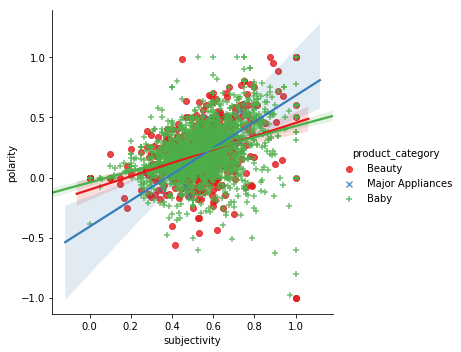

In [75]:
import itertools
mks = itertools.cycle(['o', 'x', '+'])
markers = [next(mks) for i in res["product_category"].unique()]

sns.lmplot(x="subjectivity", y="polarity", hue="product_category", data=res,
           markers=markers, palette="Set1")

In [41]:
res.shape

(27167, 13)

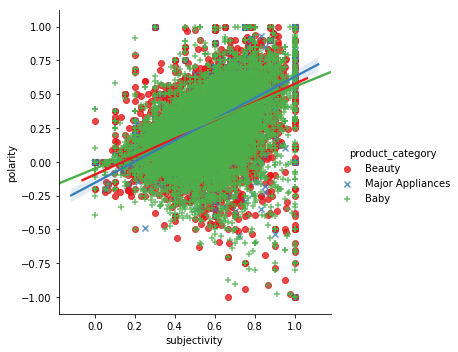

In [42]:
import itertools
mks = itertools.cycle(['o', 'x', '+'])
markers = [next(mks) for i in res["product_category"].unique()]

sns.lmplot(x="subjectivity", y="polarity", hue="product_category", data=res,
           markers=markers, palette="Set1")

In [43]:
sns.swarmplot(data=res, x='product_category', y='polarity')

KeyboardInterrupt: 

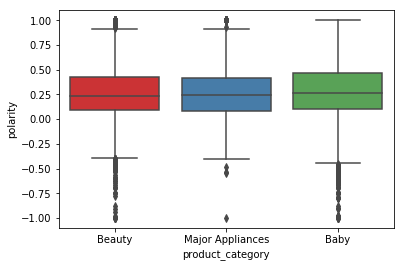

In [44]:
sns.boxplot(x="product_category", y="polarity", 
                 data=res, palette="Set1")
plt.show()

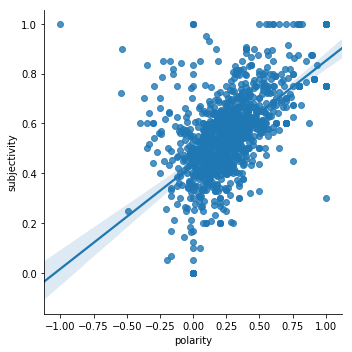

In [15]:
sns.lmplot(x = "polarity", y = "subjectivity", data = df_m)
plt.show()

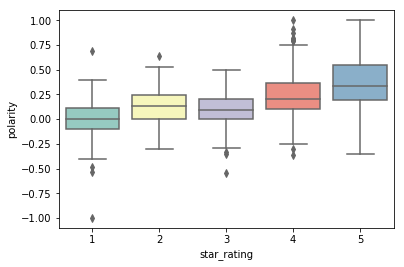

In [18]:
sns.boxplot(x="star_rating", y="polarity", 
                 data=df_m, palette="Set3")
plt.show()

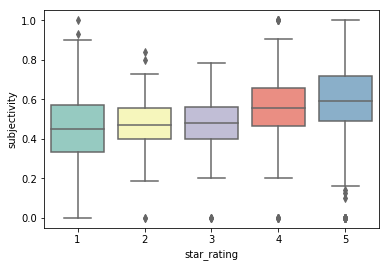

In [19]:
sns.boxplot(x="star_rating", y="subjectivity", 
                 data=df_m, palette="Set3")
plt.show()